In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import make_interp_spline

In [33]:
df = pd.read_csv('file_responsive.csv',sep=";")
df

,type,T,p,size,result
0,seq,73.128693,1,100000000,5761455
1,seq,73.146984,1,100000000,5761455
2,seq,72.915517,1,100000000,5761455
3,seq,72.558012,1,100000000,5761455
4,seq,72.524107,1,100000000,5761455
...,...,...,...,...,...
131,hybrid,252.998070,16,1600000000,79451833
132,hybrid,254.842408,16,1600000000,79451833
133,hybrid,254.793637,16,1600000000,79451833
134,hybrid,253.522602,16,1600000000,79451833


In [34]:
seq = df.loc[df['type'] == 'seq']
seq = seq.groupby(["type", "p", "size"]).min()
T1 = seq['T']
print(T1)

type  p  size     
seq   1  100000000    72.379665
Name: T, dtype: float64


In [35]:
df = df[df['type'] != "seq"]
df = df.groupby(["type", "p", "size"], as_index=False).min()
df

,type,p,size,T,result
0,hybrid,2,200000000,109.543891,11078937
1,hybrid,4,400000000,28.625983,21336326
2,hybrid,8,800000000,85.478725,41146179
3,hybrid,16,1600000000,251.843697,79451833
4,mpi,2,200000000,94.053891,11078937
5,mpi,4,400000000,148.131110,21336326
6,mpi,8,800000000,197.225794,41146179
7,mpi,16,1600000000,282.228128,79451833
8,openmp,2,200000000,103.406227,11078937
9,openmp,4,400000000,135.791556,21336326


# Przyspieszenie
- S(p) = Tsek/T(p) = T(1)/T(p)
# Efektywność 
- E(p) = S(p)/p * 100%

In [36]:

df['speed_up'] = df.apply(lambda x: T1/x["T"], axis=1)
df['efficiency'] = df.apply(lambda x: (x["speed_up"]/x["p"])*100, axis=1)
df.to_csv('output.csv', index=False)
df


,type,p,size,T,result,speed_up,efficiency
0,hybrid,2,200000000,109.543891,11078937,0.660737,33.036833
1,hybrid,4,400000000,28.625983,21336326,2.528460,63.211511
2,hybrid,8,800000000,85.478725,41146179,0.846756,10.584456
3,hybrid,16,1600000000,251.843697,79451833,0.287399,1.796245
4,mpi,2,200000000,94.053891,11078937,0.769555,38.477762
5,mpi,4,400000000,148.131110,21336326,0.488619,12.215473
6,mpi,8,800000000,197.225794,41146179,0.366989,4.587360
7,mpi,16,1600000000,282.228128,79451833,0.256458,1.602863
8,openmp,2,200000000,103.406227,11078937,0.699955,34.997730
9,openmp,4,400000000,135.791556,21336326,0.533020,13.325509


In [37]:
def show_plots(type: str):
    data = df.loc[df["type"] == type]
    p = data["p"].tolist()
    show_plot("Czas wykonania", "p", "T(n,p)", p,  data["T"].to_list())
    show_plot("Przyspieszenie obliczeń", "p", "S(n,p)", p,  data["speed_up"].tolist())
    show_plot("Efektywność zrównoleglania", "p", "E(n,p)", p,  data["efficiency"].tolist())

def show_plot(title: str, x_label: str, y_label: str, x: list, y: list):
    x = np.array(x)
    y = np.array(y)
    X_Y_Spline = make_interp_spline(x, y)
 
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    # Plotting the Graph
    plt.plot(x, y, 1, 1)
    # plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()



### Analiza wydajności programów równoległych dal stałego rozmiaru zadania obliczeniowego

### OpneMP

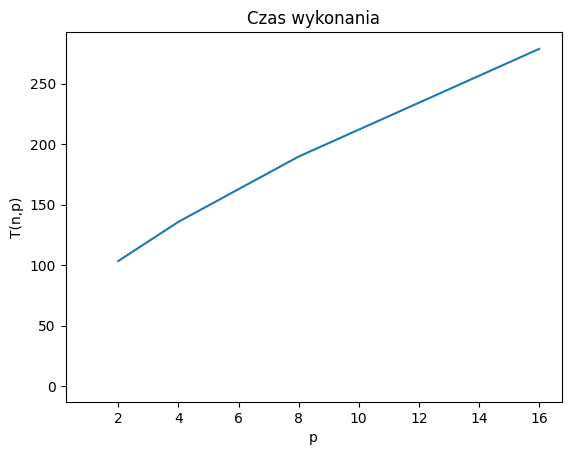

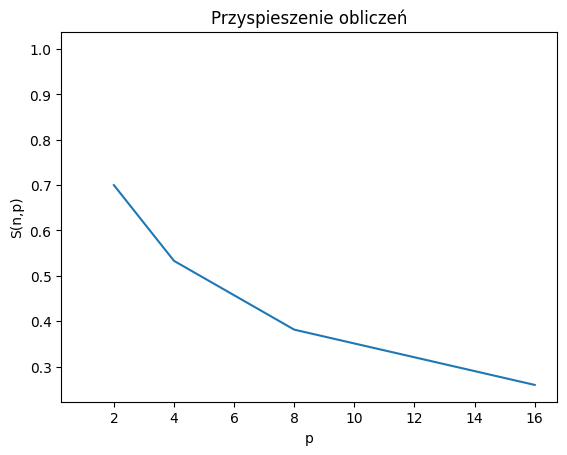

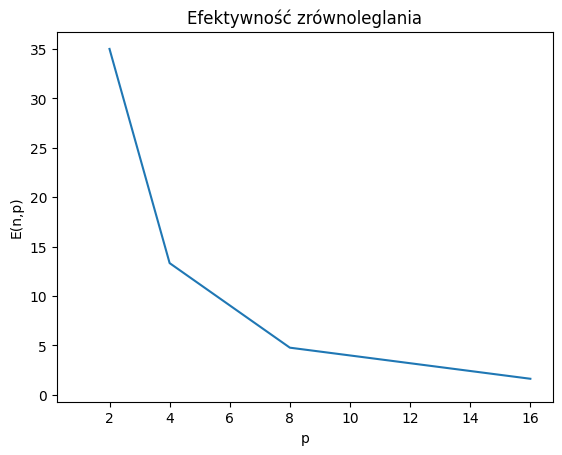

In [38]:
show_plots("openmp")

### MPI

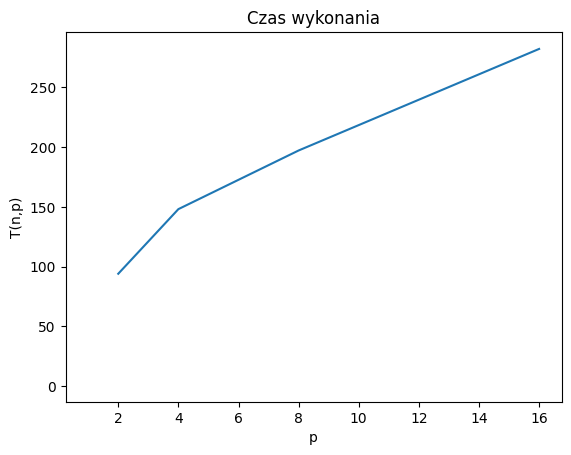

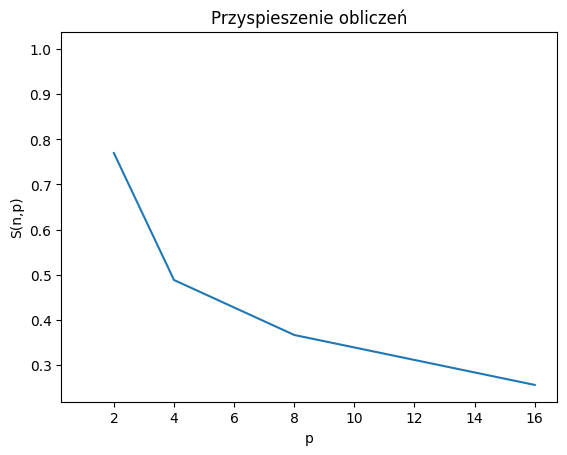

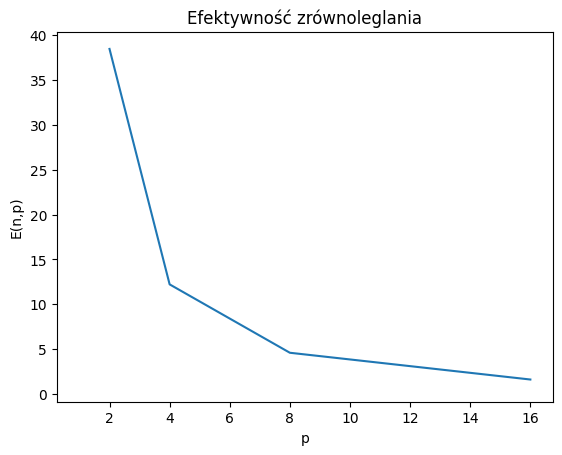

In [39]:
show_plots("mpi")

### MPI + OpenMP

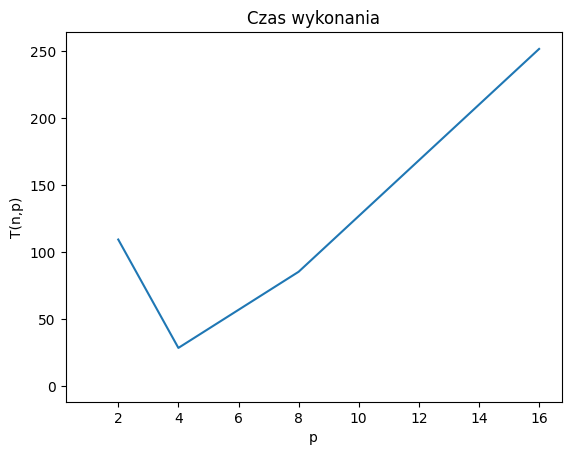

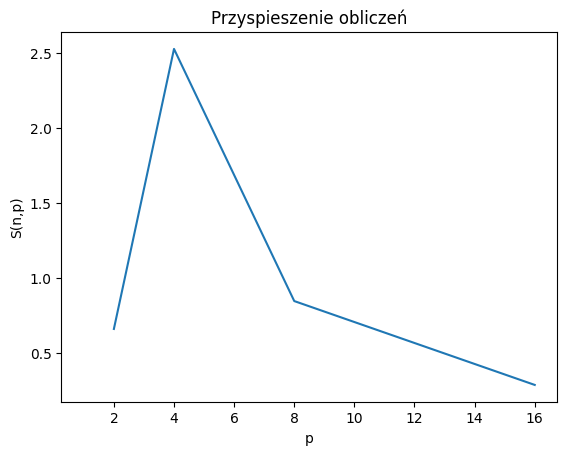

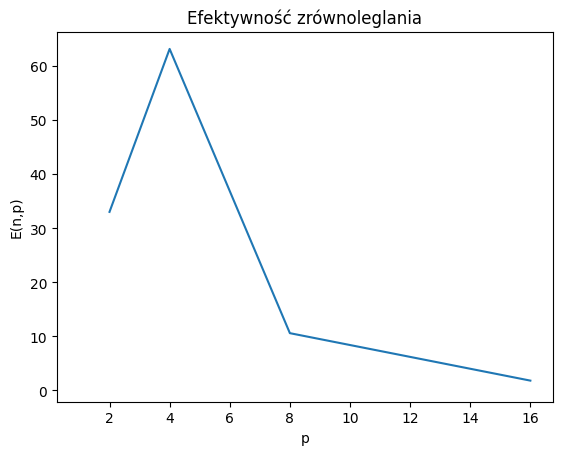

In [40]:
show_plots("hybrid")